In [57]:
from video import CountsPerSec, VideoCaptureThread, ImShowThread
import argparse
import cv2 as cv
import numpy as np
import cvlib
import sys 
import time

%matplotlib inline
%load_ext cython

# ignore distracting warnings
import warnings
warnings.filterwarnings('ignore')

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [58]:
def sharpen(img):
    kernel = np.array([[-1, -1, -1], [-1, 9.5, -1], [-1, -1, -1]])
    img_sharpen = cv.filter2D(img, -1, kernel)
    return img_sharpen

In [59]:
# img = cv.imread("imagenes/ardilla.png",cv.IMREAD_COLOR) 
img = cv.imread("imagenes/panaderia.jpg",cv.IMREAD_COLOR)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

## Tarea 2

#### Función de referencia con cv.filter2D

In [60]:
def sharpen(img):
    kernel = np.array([[-1, -1, -1], [-1, 9.5, -1], [-1, -1, -1]])
    img_sharpen = cv.filter2D(img, -1, kernel)
    return img_sharpen

### Nuestra implementación

In [88]:
def sharpener(img): 
    # Creación del kernel     
    kernel = np.array([[-1, -1, -1], 
                       [-1, 9.5, -1], 
                       [-1, -1, -1]])
    
    # obtencion de dimensiones
    f = img.shape[0]
    c = img.shape[1]
    capas = img.shape[2]

    k_f = kernel.shape[0]
    k_c = kernel.shape[1]

    # Creación de imagen con ceros 
    sharp_img  = np.zeros([f, c, capas], dtype=np.float64)

    # Verificamos si la imagen es a color
    is_color = False 

    if len(sharp_img.shape) == 3: 
        is_color = True

    # Aplicación del kernel
    if is_color == True: 
        for capa in range(capas): # Iteración capas
            for i in range(1, f-1): # Iteracion de filas 
                for j in range(1, c - 1): # Iteracion columnas
                    matriz = img[i-1:i+2, j-1:j+2, capa] # Corte de la matriz 
                    
                    matriz = np.multiply(matriz, kernel) # Calculo del kernel 
                    pixel = matriz.sum() # Suma del pixel 

                    # pixel = 0

                    # for fila in range(k_f): 
                    #     for columna in range(k_c): 
                    #         pixel += matriz[fila, columna] * kernel[fila, columna]

                    if pixel < 0: 
                        pixel = 0
                    elif pixel > 255: 
                        pixel = 255 

                    sharp_img[i, j, capa] = pixel # se guardan en la sharp_img 

    return sharp_img.astype(np.uint8)

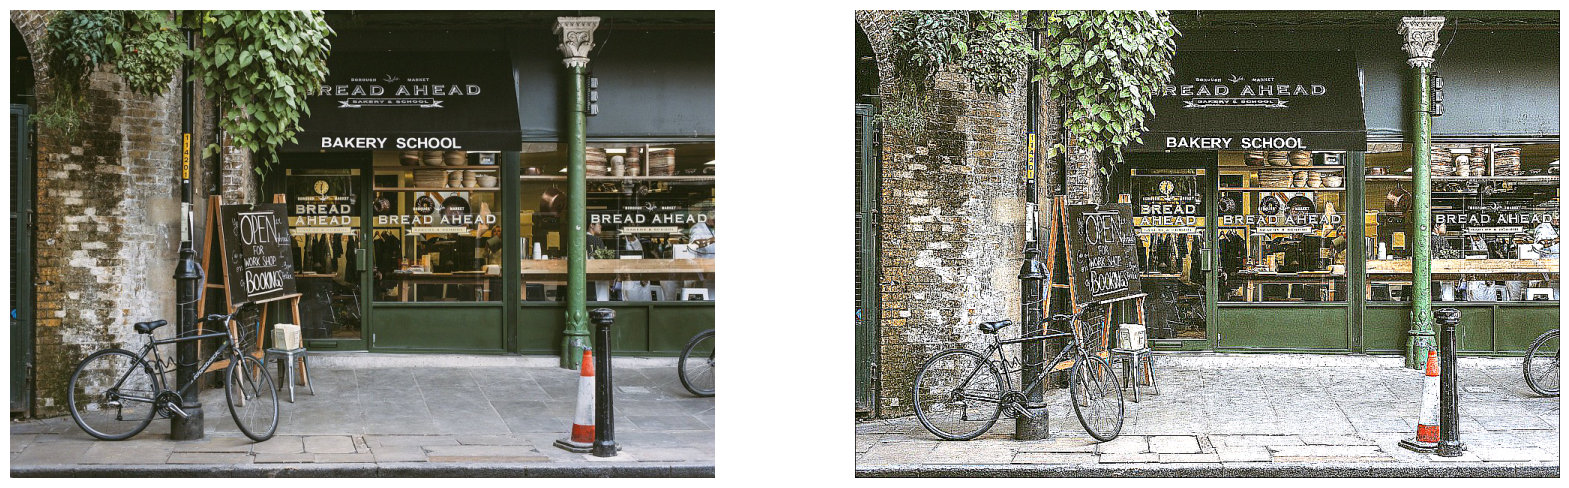

In [89]:
cvlib.imgcmp(img, sharpener(img), size=10)

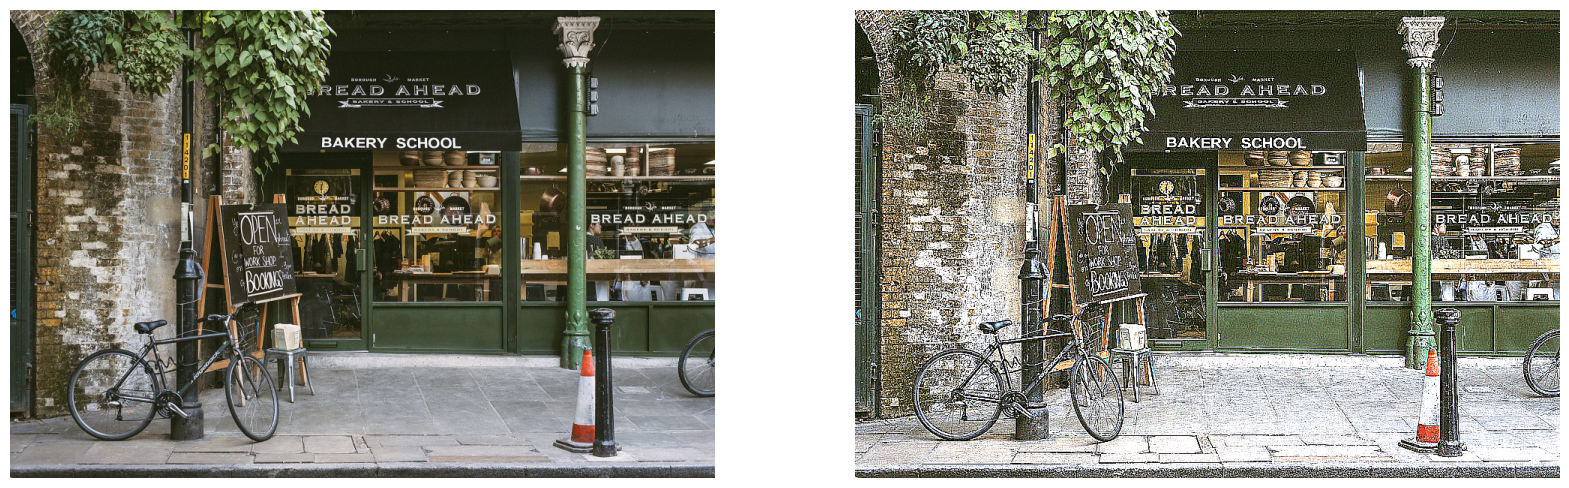

In [63]:
cvlib.imgcmp(img,sharpen(img), size=10)

## Tarea 3

### Evaluacion de la función anterior

In [91]:
%%cython -a
import numpy as np

def sharpener(img): 
    # Creación del kernel     
    kernel = np.array([[-1, -1, -1], 
                       [-1, 9.5, -1], 
                       [-1, -1, -1]])
    
    # obtencion de dimensiones
    f = img.shape[0]
    c = img.shape[1]
    capas = img.shape[2]

    k_f = kernel.shape[0]
    k_c = kernel.shape[1]

    # Creación de imagen con ceros 
    sharp_img  = np.zeros([f, c, capas], dtype=np.float64)

    # Verificamos si la imagen es a color
    is_color = False 

    if len(sharp_img.shape) == 3: 
        is_color = True

    # Aplicación del kernel
    if is_color == True: 
        for capa in range(capas): # Iteración capas
            for i in range(1, f-1): # Iteracion de filas 
                for j in range(1, c - 1): # Iteracion columnas
                    matriz = img[i-1:i+2, j-1:j+2, capa] # Corte de la matriz 
                    
                    matriz = np.multiply(matriz, kernel) # Calculo del kernel 
                    pixel = matriz.sum() # Suma del pixel 

                    # pixel = 0

                    # for fila in range(k_f): 
                    #     for columna in range(k_c): 
                    #         pixel += matriz[fila, columna] * kernel[fila, columna]

                    if pixel < 0: 
                        pixel = 0
                    elif pixel > 255: 
                        pixel = 255 

                    sharp_img[i, j, capa] = pixel # se guardan en la sharp_img 

    return sharp_img.astype(np.uint8)

Content of stdout:
_cython_magic_0e9d4dbdee738efd9b0080d401515bdf41f30b68.c
   Creando biblioteca C:\Users\chuzd\.ipython\cython\Users\chuzd\.ipython\cython\_cython_magic_0e9d4dbdee738efd9b0080d401515bdf41f30b68.cp39-win_amd64.lib y objeto C:\Users\chuzd\.ipython\cython\Users\chuzd\.ipython\cython\_cython_magic_0e9d4dbdee738efd9b0080d401515bdf41f30b68.cp39-win_amd64.exp
Generando c¢digo
Generaci¢n de c¢digo finalizada

### Mejora con cython

In [92]:
%%cython -a
import cython
import numpy as np

# def sharpener(img): 

@cython.boundscheck(False)
cpdef unsigned char[:, :, :] sharpener_cy(unsigned char[:, :, :] img):
    cdef int f, c, capas, capa, i, j, k_f, k_c
    cdef double pixel
    cdef double[:, :] kernel
    cdef unsigned char[:,:,:] sharp_img

    kernel = np.array([[-1, -1, -1], 
                        [-1, 9.5, -1], 
                        [-1, -1, -1]])
    
    # obtencion de dimensiones
    f = img.shape[0]
    c = img.shape[1]
    capas = img.shape[2]

    k_f = kernel.shape[0]
    k_c = kernel.shape[1]

    # Creación de imagen con ceros 
    sharp_img  = np.zeros((f, c, capas), dtype=np.uint8)

    # Aplicación del kernel
    for capa in range(capas): # Iteración capas
        for i in range(1, f-1): # Iteracion de filas 
            for j in range(1, c - 1): # Iteracion columnas
                matriz = img[i-1:i+2, j-1:j+2, capa] # Corte de la matriz 
                
                # matriz = np.multiply(matriz, kernel) # Calculo del kernel 
                # pixel = matriz.sum() # Suma del pixel 

                pixel = 0.0

                for fila in range(k_f): 
                    for columna in range(k_c): 
                        pixel += matriz[fila, columna] * kernel[fila, columna]

                if pixel < 0.0: 
                    pixel = 0.0
                elif pixel > 255.0: 
                    pixel = 255.0

                sharp_img[i, j, capa] = int(pixel) # se guardan en la sharp_img 

    return sharp_img

Content of stdout:
_cython_magic_f617bc406447bc29ce6c99020483617dd7b63774.c
C:\Users\chuzd\.ipython\cython\_cython_magic_f617bc406447bc29ce6c99020483617dd7b63774.c(1544): warning C4005: '__pyx_nonatomic_int_type': redefinici¢n de macro
C:\Users\chuzd\.ipython\cython\_cython_magic_f617bc406447bc29ce6c99020483617dd7b63774.c(1495): note: vea la definici¢n anterior de '__pyx_nonatomic_int_type'
C:\Users\chuzd\.ipython\cython\_cython_magic_f617bc406447bc29ce6c99020483617dd7b63774.c(17582): warning C4244: '=': conversi¢n de 'Py_ssize_t' a 'int'; posible prdida de datos
C:\Users\chuzd\.ipython\cython\_cython_magic_f617bc406447bc29ce6c99020483617dd7b63774.c(17591): warning C4244: '=': conversi¢n de 'Py_ssize_t' a 'int'; posible prdida de datos
C:\Users\chuzd\.ipython\cython\_cython_magic_f617bc406447bc29ce6c99020483617dd7b63774.c(17600): warning C4244: '=': conversi¢n de 'Py_ssize_t' a 'int'; posible prdida de datos
C:\Users\chuzd\.ipython\cython\_cython_magic_f617bc406447bc29ce6c9902048361

In [80]:
%timeit sharpener(img)

6.83 s ± 448 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [93]:
%timeit sharpener_cy(img)

80.6 ms ± 11.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


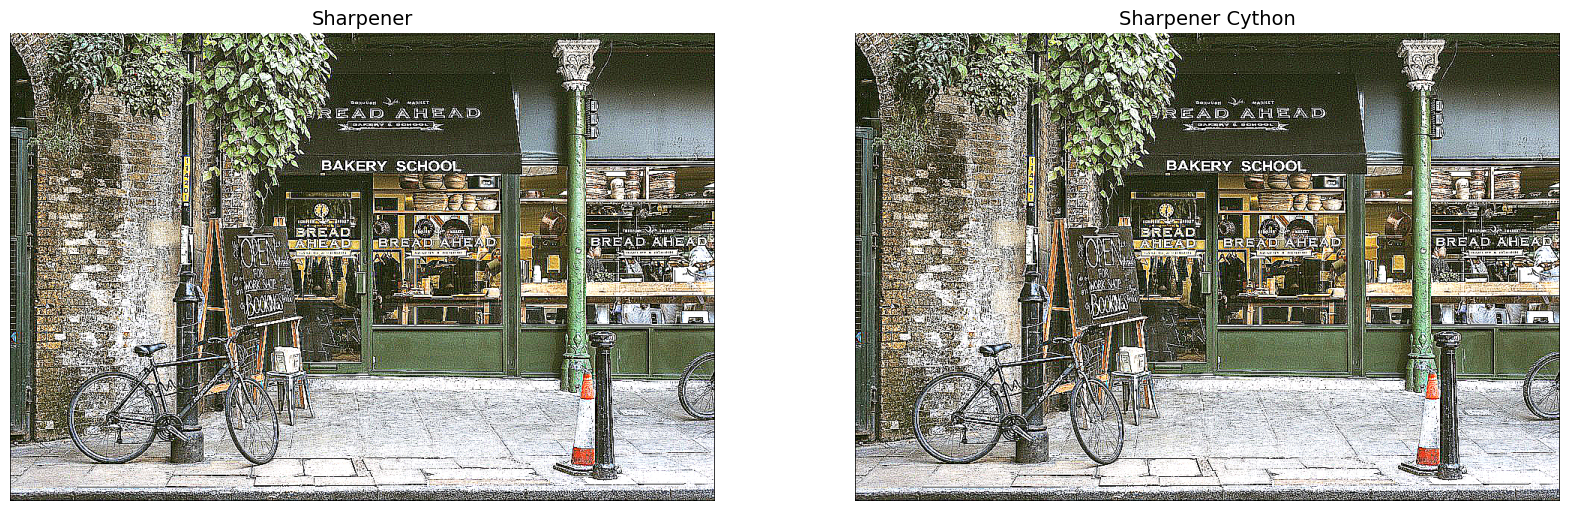

In [97]:
cvlib.imgcmp(sharpener(img), sharpener_cy(img), title=["Sharpener", "Sharpener Cython"], size=10)

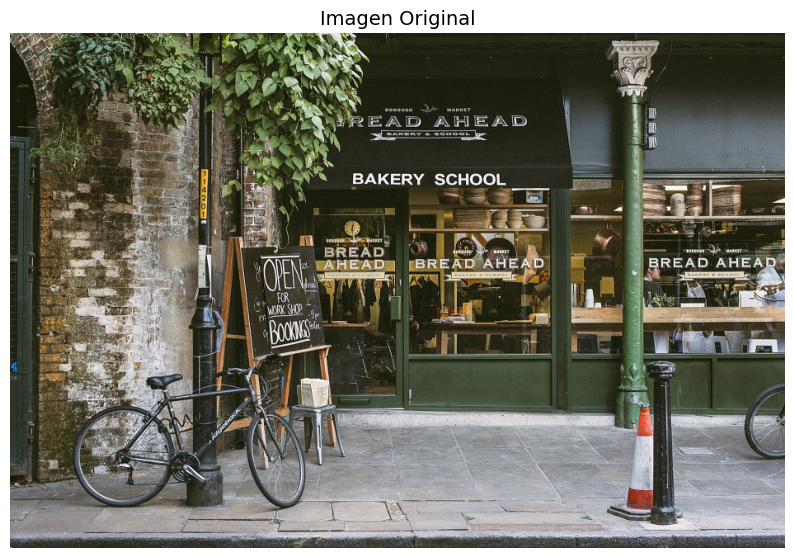

In [98]:
cvlib.imgview(img, title="Imagen Original", size=10)

### Pruebas con Compilación Cython

In [100]:
from external import sharpener_cy

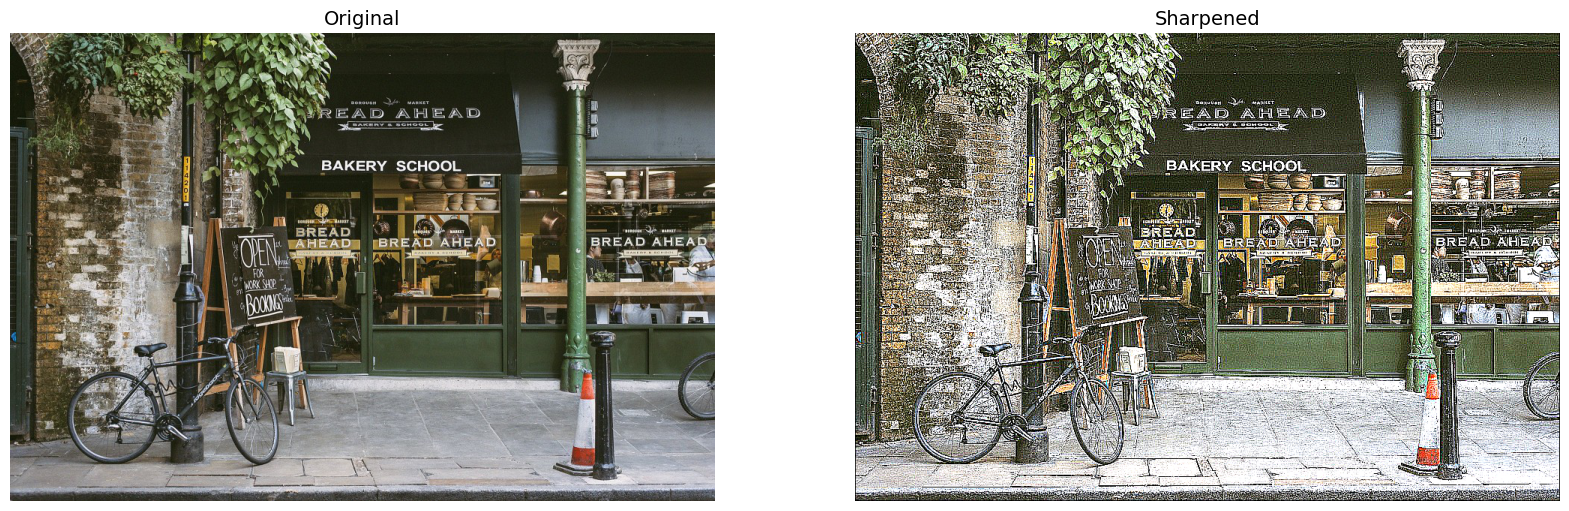

In [103]:
cvlib.imgcmp(img, sharpener_cy(img), title=["Original", "Sharpened"], size= 10)